In [67]:
%matplotlib inline

# Data Frames

## Introduction

What is a DataFrame? a 2-D labeled data structure with columns of potentially different type.

![](dataframe.png)

This type of data should feel rather familiar to Excel or Stata users. It is also an elementary brick of "relational databases" which consist in several related dataframes (aka tables). There is a specialized language (SQL) to query this data bases. It is the defacto standard for database work.

![](relational_database.png)

### Pandas

[pandas](https://pandas.pydata.org/) is a python library providing a dataframe object (and Series which are columns of DataFrames). It was created by Wes McKinsey, and is a very optimized piece of software with many, many options. It features:

- handling of missing data
- automatic and explicit data alignment
- hierarchical labeling
- very fast IO

pandas implement:
- optimized operations (mean, sum, ...) with split/apply/combine semantics
- many slicing/indexing options
- intuitive merging/joinging of datasets
- flexible reshaping and pivoting of data sets

What is Pandas scope? intermediate size databases
- too small to require to learn sql
- in-memory computations

Alternatives for other tasks:
- xarray: multidimensional arrays with labelled dimensions
- dask: pandas-like syntax for out-of-memory operations.

Used with Pandas:
- odo: data conversion/import
- statsmodels: regression and statistics
- scikit-learn: machine learning
- matplotlib: plots

The number of options for a given task can be intimidating. We tend to follow the [minimially sufficient pandas](https://medium.com/dunder-data/minimally-sufficient-pandas-a8e67f2a2428), that is to us a small subset of available features, even if that means longer code.
There are tons of tutorials out there, including a 10 min introduction in pandas [doc](https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html). The handbook "Python for Data Analysis Book" is also highly recommended.

## Short primer

In [1]:
import pandas as pd
import numpy as np

### Creation

#### By Hand

In [11]:
# from array
x = np.random.rand(5,2)
df = pd.DataFrame(x, columns=['x', 'y'])
df

,x,y
0,0.471951,0.177929
1,0.599252,0.919160
2,0.404727,0.494371
3,0.882710,0.608980
4,0.138942,0.330576


In [13]:
df.values, df.index, df.columns

(array([[0.47195133, 0.17792941],
        [0.59925183, 0.91916005],
        [0.4047273 , 0.49437105],
        [0.88271033, 0.60897962],
        [0.13894207, 0.33057628]]),
 RangeIndex(start=0, stop=5, step=1),
 Index(['x', 'y'], dtype='object'))

In [15]:
# from dictionary
v1 = np.random.rand(5)
v2 = np.random.rand(5)
pd.DataFrame({'x':v1, 'y':v2})

,x,y
0,0.476913,0.036397
1,0.945255,0.890557
2,0.474179,0.922363
3,0.978214,0.234032
4,0.709800,0.945848


In [36]:
# if columns are not alignes, one needs to use series
s1 = pd.Series(v1[:-1], name='x')
s2 = pd.Series(v2[1:], index=range(1,5), name='y')

In [37]:
s1

0    0.476913
1    0.945255
2    0.474179
3    0.978214
Name: x, dtype: float64

In [38]:
s2

1    0.890557
2    0.922363
3    0.234032
4    0.945848
Name: y, dtype: float64

In [40]:
ddf = pd.concat([s1,s2],axis=1)
ddf

,x,y
0,0.476913,NaN
1,0.945255,0.890557
2,0.474179,0.922363
3,0.978214,0.234032
4,NaN,0.945848


In [44]:
# a data frame can be viewed as a record array, with additional index and columns informations
# they can be changed after the dataframe is created
ddf.index = range(1997, 2002)
ddf

,x,y
1997,0.476913,NaN
1998,0.945255,0.890557
1999,0.474179,0.922363
2000,0.978214,0.234032
2001,NaN,0.945848


#### From file

The following file formats map naturally to pandas DataFrames.

In [56]:
# csv file (check filetype and delimiters: comma-separated values can by separated, by... anything)
# read_csv
# pd.read_csv?
movies_df = pd.read_csv('movies_cured.csv')

In [58]:
movies_df.head(5)

,Genre,Title,Director,Date,Studio,IMDb Rating,Length,Budget,Gross($M),Profit,Profit%,US%,US($M),Overseas($M),Overseas%
0,animation,Inside Out,Pete Docter,6/19/15,Buena Vista Studios,8.8,102,175.0,266.6,91.6,52.3,185.1,69.4,81.5,30.6
1,action,Jurassic World,Colin Trevorrow,6/12/15,Universal,7.5,124,215.0,1245.9,1030.9,479.5,500.4,40.2,745.5,59.8
2,action,San Andreas,Brad Peyton,5/29/15,WB,6.6,114,110.0,441.2,331.2,301.1,142.0,32.2,299.2,67.8
3,action,Tomorrowland,Brad Bird,5/22/15,Buena Vista Studios,6.7,130,170.0,202.1,32.1,18.9,90.2,44.6,111.9,55.4
4,action,Mad Max: Fury Road,George Miller,5/15/15,WB,8.5,120,150.0,356.4,206.4,137.6,147.1,41.3,209.3,58.7


In [21]:
# stata

In [22]:
# xls (cf openpyxl)

#### From database

In [23]:
# from sql (cf sqlalchemy)

In [59]:
# from dbnomics (install using pip install dbnomics)

import dbnomics

In [63]:
provider = 'OECD/MEI'
series_id = ['GBR.CP010000.CTGY.M', 'FRA.CP010000.CTGY.M']

In [65]:
tables = [
    dbnomics.fetch_series(provider_code=provider, dataset_code=s)
    for s in series_id
]

In [70]:
df_fra = tables[1]

In [76]:
df_fra.head(3)

,@frequency,dataset_code,dataset_name,indexed_at,provider_code,series_code,series_name,value,original_period,period,FREQUENCY,LOCATION,MEASURE,SUBJECT
0,monthly,MEI,Main Economic Indicators Publication,2019-02-17T06:28:53.593Z,OECD,FRA.CP010000.CTGY.M,France – Consumer Price Index > Food and non-A...,-0.016404,2010-02,2010-02-01,M,FRA,CTGY,CP010000
1,monthly,MEI,Main Economic Indicators Publication,2019-02-17T06:28:53.593Z,OECD,FRA.CP010000.CTGY.M,France – Consumer Price Index > Food and non-A...,0.071025,2010-03,2010-03-01,M,FRA,CTGY,CP010000
2,monthly,MEI,Main Economic Indicators Publication,2019-02-17T06:28:53.593Z,OECD,FRA.CP010000.CTGY.M,France – Consumer Price Index > Food and non-A...,0.123185,2010-04,2010-04-01,M,FRA,CTGY,CP010000


In [77]:
# extract relevant columns
df_fra[['original_period','LOCATION','value']]

,original_period,LOCATION,value
0,2010-02,FRA,-0.016404
1,2010-03,FRA,0.071025
2,2010-04,FRA,0.123185
3,2010-05,FRA,0.121291
4,2010-06,FRA,0.190954
5,2010-07,FRA,0.222331
6,2010-08,FRA,0.196264
7,2010-09,FRA,0.126856
8,2010-10,FRA,0.069584
9,2010-11,FRA,0.134232


In [79]:
# extract relevant columns
dfs = [df[['original_period','LOCATION','value']] for df in tables]

In [134]:
df = dfs[0]
df = df[df['value']!='NA']
df['value'] = df['value'].astype('float64')
dfs[0] = df

/home/pablo/.local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [84]:
from matplotlib import pyplot as palt

In [136]:
df = dfs[0]

In [142]:
val = df['value']

In [145]:
dfs[0].head(5)

,original_period,LOCATION,value
0,2010-02,GBR,0.123056
1,2010-03,GBR,0.196058
2,2010-04,GBR,0.268586
3,2010-05,GBR,0.161622
4,2010-06,GBR,0.171977


In [146]:
dfs[1].head(5)

,original_period,LOCATION,value
0,2010-02,FRA,-0.016404
1,2010-03,FRA,0.071025
2,2010-04,FRA,0.123185
3,2010-05,FRA,0.121291
4,2010-06,FRA,0.190954


In [147]:
long_table = pd.concat(dfs)

In [152]:
long_table['original_period'] = pd.to_datetime(long_table['original_period'])

In [153]:
long_table.dtypes

original_period    datetime64[ns]
LOCATION                   object
value                     float64
dtype: object

In [154]:
lt = long_table

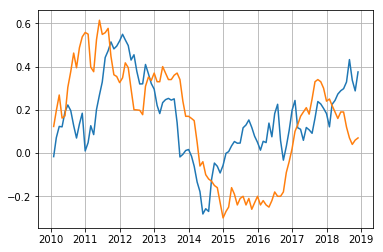

In [156]:
ss = lt[lt['LOCATION']=='FRA']
ss2 = lt[lt['LOCATION']=='GBR']

plt.plot(ss['original_period'], ss['value'])
plt.plot(ss['original_period'], ss2['value'])
plt.grid()

In [158]:
import  altair as alt

In [ ]:
alt.Chart(long_table).mark_point()

In [172]:
base = alt.Chart(long_table)
ch1 = base.mark_line().encode(x='original_period', y='value', color='LOCATION')
ch2 = base.mark_point().encode(x='original_period', y='value', color='LOCATION').interactive()

In [176]:
gr = ch1+ch2

In [175]:
gr.save("graph.json")

In [ ]:
# import altair
# altair.datasets.list_datasets()

### Export

In [177]:
# .to_csv
lt.to_csv('long_table.csv')

In [178]:
# .to_xls
import xlsxwriter

In [27]:
# pickle

### Basic manipulation

In [28]:
# .head
# .tail
# .describe
# .mean
# std

In [179]:
lt.head(5)

,original_period,LOCATION,value
0,2010-02-01,GBR,0.123056
1,2010-03-01,GBR,0.196058
2,2010-04-01,GBR,0.268586
3,2010-05-01,GBR,0.161622
4,2010-06-01,GBR,0.171977


In [180]:
lt.tail(5)

,original_period,LOCATION,value
102,2018-08-01,FRA,0.328734
103,2018-09-01,FRA,0.432391
104,2018-10-01,FRA,0.337300
105,2018-11-01,FRA,0.287603
106,2018-12-01,FRA,0.375232


In [181]:
lt.describe()

,value
count,214.000000
mean,0.155246
std,0.218843
min,-0.300000
25%,0.017311
50%,0.174778
75%,0.327984
max,0.614378


In [182]:
lt.mean()

value    0.155246
dtype: float64

In [185]:
lt[lt['LOCATION']=='GBR'].mean()

value    0.147072
dtype: float64

In [30]:
# groupby:
# groupby().fun()
# groupby().agg({'col':'fun'})

In [187]:
lt.groupby('LOCATION').mean()

,value
LOCATION,
FRA,0.163420
GBR,0.147072


In [194]:
lt.groupby('LOCATION').agg({'value':np.mean})

,value
LOCATION,
FRA,0.163420
GBR,0.147072


### Indexing, slicing

In [198]:
movies = altair.datasets.load_dataset('movies')

In [199]:
import altair
df = altair.datasets.load_dataset('us-employment')
df.head(5)

,month,nonfarm,private,goods_producing,service_providing,private_service_providing,mining_and_logging,construction,manufacturing,durable_goods,...,transportation_and_warehousing,utilities,information,financial_activities,professional_and_business_services,education_and_health_services,leisure_and_hospitality,other_services,government,nonfarm_change
0,2006-01-01,135450,113603,22467,112983,91136,656,7601,14210,8982,...,4420.0,549.8,3052,8307,17299,17946,12945,5425,21847,282
1,2006-02-01,135762,113884,22535,113227,91349,662,7664,14209,8986,...,4429.4,550.1,3052,8332,17365,17998,12980,5426,21878,312
2,2006-03-01,136059,114156,22572,113487,91584,669,7689,14214,9000,...,4429.7,547.5,3055,8348,17438,18045,13034,5425,21903,297
3,2006-04-01,136227,114308,22631,113596,91677,679,7726,14226,9020,...,4445.4,548.9,3046,8369,17462,18070,13074,5426,21919,168
4,2006-05-01,136258,114332,22597,113661,91735,681,7713,14203,9017,...,4459.4,548.3,3039,8376,17512,18100,13052,5433,21926,31


In [2]:
# index columns with brackets->resulting object is a Series
df['nonfarm'].head(4)

0    135450
1    135762
2    136059
3    136227
Name: nonfarm, dtype: int64

In [201]:
df.loc[range(0,5), ('nonfarm','private')]

,nonfarm,private
0,135450,113603
1,135762,113884
2,136059,114156
3,136227,114308
4,136258,114332


In [3]:
# index columns with loc: like indexing a 2d array
# note that extreme values of intervals are included !
df.loc[0:2,['month','nonfarm']]


,month,nonfarm
0,2006-01-01,135450
1,2006-02-01,135762
2,2006-03-01,136059


In [60]:
# index columns with lioc: like indexing a 2d array with integer values
# note that extreme values of intervals are included !
df.iloc[0:2,3:5]


,goods_producing,service_providing
0,22467,112983
1,22535,113227


### Combining, reshaping dataframes

In [202]:
import pandas as pd
import numpy as np

In [203]:
df = pd.DataFrame({ 'A' : ['one', 'one', 'two', 'three'] * 3,
                    'B' : ['A', 'B', 'C'] * 4,
                    'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                    'D' : np.random.randn(12),
                    'E' : np.random.randn(12)})

In [204]:
df

,A,B,C,D,E
0,one,A,foo,-0.041798,-0.596777
1,one,B,foo,1.693384,-1.388748
2,two,C,foo,-0.125877,-0.258700
3,three,A,bar,-0.046162,0.305621
4,one,B,bar,1.083228,-0.917981
5,one,C,bar,-0.893472,-0.208430
6,two,A,foo,-0.595817,1.325090
7,three,B,foo,-0.953634,2.074944
8,one,C,foo,-0.300990,-0.603070
9,one,A,bar,-0.801291,-0.031512


In [205]:
pt = pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])
pt

C             bar       foo
A     B                    
one   A -0.801291 -0.041798
      B  1.083228  1.693384
      C -0.893472 -0.300990
three A -0.046162       NaN
      B       NaN -0.953634
      C -0.528195       NaN
two   A       NaN -0.595817
      B -1.249025       NaN
      C       NaN -0.125877

In [16]:
# note that the result has special hierarchical indices (multindex)
# to get rid of them: .reset_index
pt.reset_index()

C,A,B,bar,foo
0,one,A,-0.376776,-0.479112
1,one,B,0.191390,1.645694
2,one,C,-0.563126,-0.568572
3,three,A,0.843359,NaN
4,three,B,NaN,-0.309535
5,three,C,1.626399,NaN
6,two,A,NaN,-2.139900
7,two,B,1.021299,NaN
8,two,C,NaN,-0.086042


**Using MultiIndex to reorganize the information in a DataFrame**

In [5]:
dfi = df.set_index(['A','B','C'])

In [6]:
dfi

D         E
A     B C                      
one   A foo  0.042490 -0.043692
      B foo -0.120333 -0.281835
two   C foo  0.175495  0.580749
three A bar  0.039859 -0.541817
one   B bar -1.208724  0.182690
      C bar  0.225546 -1.200098
two   A foo -0.068632  1.329266
three B foo  1.978199 -0.750169
one   C foo -0.709990  0.745212
      A bar  0.328635 -2.024948
two   B bar -1.273351 -0.495985
three C bar  0.828350 -0.785491

In [71]:
dfi.unstack(level='C')

D                   E          
C             bar       foo       bar       foo
A     B                                        
one   A -1.139532 -1.147829  0.092835  1.808482
      B  0.284371  0.367665 -0.052488  1.262942
      C -1.905237  0.074089  0.068501  1.597474
three A  0.569115       NaN -0.355622       NaN
      B       NaN -0.746973       NaN -0.796331
      C  0.612354       NaN -0.824024       NaN
two   A       NaN  1.363116       NaN -2.470829
      B  1.120662       NaN  0.202382       NaN
      C       NaN  1.412131       NaN  0.532147

In [72]:
dfi['D'].unstack(level='C')         #Same as the pivot table result

C             bar       foo
A     B                    
one   A -1.139532 -1.147829
      B  0.284371  0.367665
      C -1.905237  0.074089
three A  0.569115       NaN
      B       NaN -0.746973
      C  0.612354       NaN
two   A       NaN  1.363116
      B  1.120662       NaN
      C       NaN  1.412131

### Visualization

There are many options to visualize dataframe including:
- pandas plotting methods
- indexing+matplotlib
- altair

#### Altair

Altair is a python wrapper to the vega-lite language, which itself is an extension of grammar-of-graphics to allow for interactions.